In [2]:
# Import Libraries:
from datetime import datetime, timedelta # Datetime Feature
import pandas as pd # Import Pandas
import panel as pn # Import Panel
import plotly.express as px # Import Plotly
pn.extension("plotly")# Import Plotly Extension
from pprint import pprint
import requests # To fetch data from our url API

# Import and initialize coinmetrics API (in this case `cm` for the Coinmetrics Community API)
import coinmetrics # Coinmetrics API
cm = coinmetrics.Community()

In [3]:
# API INPUTS
asset = "btc"
begin_timestamp = (datetime.now() - timedelta(days=90)).date()
end_timestamp = (datetime.now() - timedelta(days=0)).date()
# end_timestamp = datetime.now().date()


# API OUTPUT (Coinmetrics Community URL API)
asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&end_time={end_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()
# pprint(asset_data)



In [7]:
# Initiate clean dictionary
data_dictionary = {
    "date" : [],
    "open" : [],
    "close" : [],
    "high" : [],
    "low" : [],
    "volume" : [],
    "vwap" : [], 
}

# Use For Loop to interate through data and populate dictionary
for entry in asset_data['data']:
    data_dictionary['date'].append(entry['time'])
    data_dictionary['open'].append(float(entry['price_open']))
    data_dictionary['close'].append(float(entry['price_close']))
    data_dictionary['high'].append(float(entry['price_high']))
    data_dictionary['low'].append(float(entry['price_low']))
    data_dictionary['volume'].append(float(entry['volume']))
    data_dictionary['vwap'].append(float(entry['vwap']))

#Convert dictionary into Pandas dataframe and format to two decimals
asset_data_df = pd.DataFrame.from_dict(data_dictionary)
pd.options.display.float_format = "{:,.2f}".format
# INSERT HERE >>> FIND WAY TO CLEAN DATE DATA

# View dataframe
asset_data_df.head()


,date,open,close,high,low,volume,vwap
0,2021-08-14T00:00:00.000000000Z,"47,833.64","47,109.65","48,176.52","46,034.93","8,130.37","47,058.36"
1,2021-08-15T00:00:00.000000000Z,"47,109.64","47,014.49","47,400.00","45,525.19","7,745.70","46,434.56"
2,2021-08-16T00:00:00.000000000Z,"47,014.38","45,902.46","48,076.52","45,676.91","10,467.66","46,833.03"
3,2021-08-17T00:00:00.000000000Z,"45,903.22","44,671.58","47,174.62","44,405.39","12,756.15","45,777.64"
4,2021-08-18T00:00:00.000000000Z,"44,675.34","44,707.98","46,035.27","44,216.47","10,327.50","45,113.73"


# Rolling Average

In [13]:
asset_data_rolling_30day = asset_data_df['close'].rolling(window=30).mean()
print(asset_data_rolling)


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
86   60,727.40
87   61,147.15
88   61,555.62
89   61,803.12
90   62,096.54
Name: close, Length: 91, dtype: float64


# RSI - Alex

# BOLLINGER BANDS - Alex

# MAC D - Saydee

# V Wap - Saydee

# Rolling Averages - Jeff

# SKDJ - Stochastic Oscillator - Anjan

In [29]:
# Define Periods
k_period = 14
d_period = 3

# Adds a 'n_high' column with max value of previous 14 periods
asset_data_df['n_high'] = asset_data_df['high'].rolling(k_period).max()

# Adds a 'n_low' column with min value of previous 14 periods
asset_data_df['n_low'] = asset_data_df['low'].rolling(k_period).min()

#Uses the min/max values to calculate the %k (as a percentage)
asset_data_df['%k'] = (asset_data_df['close'] - asset_data_df['n_low']) * 100 / (asset_data_df['n_high'] - asset_data_df['n_low'])

# Uses the %k to calculate a SMA over the past 3 values of %k
asset_data_df['%d'] = asset_data_df['%k'].rolling(d_period).mean()

asset_data_df.head(50)

,date,open,close,high,low,volume,vwap,n_high,n_low,%k,%d
0,2021-08-14T00:00:00.000000000Z,"47,833.64","47,109.65","48,176.52","46,034.93","8,130.37","47,058.36",NaN,NaN,NaN,NaN
1,2021-08-15T00:00:00.000000000Z,"47,109.64","47,014.49","47,400.00","45,525.19","7,745.70","46,434.56",NaN,NaN,NaN,NaN
2,2021-08-16T00:00:00.000000000Z,"47,014.38","45,902.46","48,076.52","45,676.91","10,467.66","46,833.03",NaN,NaN,NaN,NaN
3,2021-08-17T00:00:00.000000000Z,"45,903.22","44,671.58","47,174.62","44,405.39","12,756.15","45,777.64",NaN,NaN,NaN,NaN
4,2021-08-18T00:00:00.000000000Z,"44,675.34","44,707.98","46,035.27","44,216.47","10,327.50","45,113.73",NaN,NaN,NaN,NaN
5,2021-08-19T00:00:00.000000000Z,"44,709.10","46,770.14","47,088.08","43,955.00","11,938.12","45,486.35",NaN,NaN,NaN,NaN
6,2021-08-20T00:00:00.000000000Z,"46,769.02","49,342.40","49,400.00","46,644.95","13,184.67","48,000.67",NaN,NaN,NaN,NaN
7,2021-08-21T00:00:00.000000000Z,"49,349.99","48,867.02","49,821.92","48,285.28","9,574.84","49,058.09",NaN,NaN,NaN,NaN
8,2021-08-22T00:00:00.000000000Z,"48,870.21","49,284.63","49,526.13","48,102.89","6,243.40","48,847.07",NaN,NaN,NaN,NaN
9,2021-08-23T00:00:00.000000000Z,"49,284.38","49,506.50","50,505.00","49,012.84","10,824.27","49,881.69",NaN,NaN,NaN,NaN


### Creating SKDJ Chart

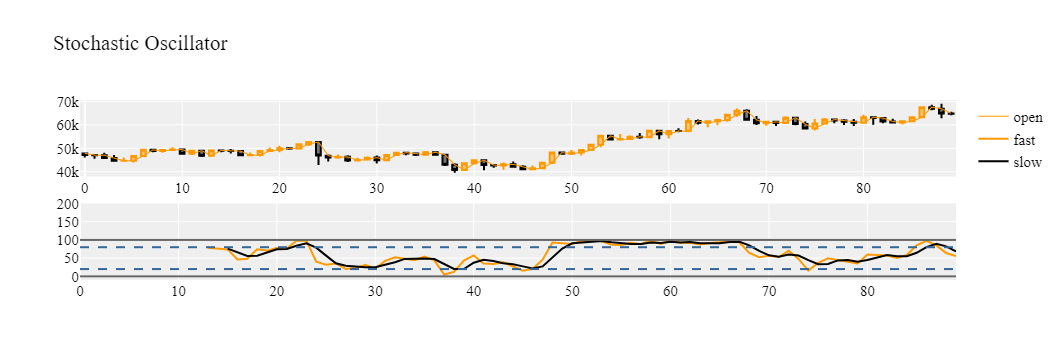

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create primary chart
fig = make_subplots(rows=2, cols=1)

# Create Candlestick chart with an overlaid price line
fig.append_trace(
    go.Candlestick(
        x=asset_data_df.index,
        open = asset_data_df['open'],
        high = asset_data_df['high'],
        low = asset_data_df['low'],
        close = asset_data_df['close'],
        increasing_line_color = '#ff9900',
        decreasing_line_color = 'black',
        showlegend = False
    ), row=1, col=1 
)

# price Line
fig.append_trace(
    go.Scatter(
        x = asset_data_df.index,
        y = asset_data_df['open'],
        line = dict(color='#ff9900', width=1),
        name = 'open',
    ), row=1, col=1
)

# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x = asset_data_df.index,
        y = asset_data_df['%k'],
        line = dict(color='#ff9900', width=2),
        name = 'fast',
    ), row=2, col=1
)

# Slow Signal (%d)
fig.append_trace(
    go.Scatter(
        x = asset_data_df.index,
        y = asset_data_df['%d'],
        line = dict(color='#000000', width=2),
        name = 'slow'
    ), row=2, col=1
)

# Extend our y-axis
fig.update_yaxes(range=[-10, 200], row=2, col=1)

# Add upper/lower bounds
fig.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
fig.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)

# Add overbought/oversold
fig.add_hline(y=20, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=80, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='sans serif',
    font_color='#000000',
    font_size=15,
    title = 'Stochastic Oscillator',
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
fig.update_layout(layout)

fig.show()

In [38]:
### Logic
# # Overbought status
# if k > 80 and d > 80 and k < d:
#     sell
# # Oversold status   
# else if k < 20 and d < 20 and k > d:
#     buy
# # Something in the middle
# else:
#     do nothing

# NVT - Network Value to Transaction

# The Puell Multiple - Brian / Jeff

# Sharpe Ratios

In [9]:
# Risk free rate doc saves in resources
# SAMPLE: risk_free_rate = 0.0000022
# combined_sharpe_ratios = ((combined_returns.mean()-(risk_free_rate)) * 252) / (combined_returns.std() * np.sqrt(252))
